 ## Sustainability optimisation: sample solution



Load the networks and construct onion layer feature vectors.

In [60]:
import networkx as nx
import os, glob
import pandas as pd

In [61]:
rows = []
targets = []

labels = os.listdir("data")
for label in labels:
    print(label)
    for path in glob.glob("data/" + label + "/*"):
        print(path)
        G = nx.read_adjlist(path, nodetype=int)
        od = nx.onion_layers(G)
        layer_size = {}
        for i in range(1, 101):
            layer_i = [v for v in od.keys() if od[v] == i]
            layer_size[i] = len(layer_i)
        print(layer_size)

        rows.append(pd.Series(layer_size, name=path))
        targets.append(label)

X = pd.DataFrame(rows)
y = pd.Series(targets)

GEOM3
data/GEOM3/9.txt
{1: 330, 2: 1498, 3: 375, 4: 79, 5: 30, 6: 5, 7: 1, 8: 1, 9: 3367, 10: 1687, 11: 762, 12: 336, 13: 186, 14: 90, 15: 51, 16: 31, 17: 19, 18: 8, 19: 6, 20: 5, 21: 3, 22: 2, 23: 4211, 24: 2826, 25: 1309, 26: 753, 27: 422, 28: 168, 29: 109, 30: 54, 31: 37, 32: 25, 33: 12, 34: 6, 35: 3, 36: 2, 37: 3072, 38: 1959, 39: 815, 40: 383, 41: 170, 42: 74, 43: 38, 44: 17, 45: 7, 46: 7, 47: 1420, 48: 730, 49: 239, 50: 93, 51: 34, 52: 17, 53: 1, 54: 2, 55: 4, 56: 1, 57: 517, 58: 220, 59: 27, 60: 6, 61: 143, 62: 52, 63: 2, 64: 7, 65: 10, 66: 10, 67: 0, 68: 0, 69: 0, 70: 0, 71: 0, 72: 0, 73: 0, 74: 0, 75: 0, 76: 0, 77: 0, 78: 0, 79: 0, 80: 0, 81: 0, 82: 0, 83: 0, 84: 0, 85: 0, 86: 0, 87: 0, 88: 0, 89: 0, 90: 0, 91: 0, 92: 0, 93: 0, 94: 0, 95: 0, 96: 0, 97: 0, 98: 0, 99: 0, 100: 0}
data/GEOM3/8.txt
{1: 4, 2: 4, 3: 2, 4: 1, 5: 10, 6: 6, 7: 3, 8: 1, 9: 1, 10: 12, 11: 11, 12: 6, 13: 6, 14: 3, 15: 23, 16: 5, 17: 3, 18: 37, 19: 22, 20: 15, 21: 11, 22: 4, 23: 3, 24: 69, 25: 53, 26: 38, 2

In [62]:
list(X.iloc[0,:])

[330,
 1498,
 375,
 79,
 30,
 5,
 1,
 1,
 3367,
 1687,
 762,
 336,
 186,
 90,
 51,
 31,
 19,
 8,
 6,
 5,
 3,
 2,
 4211,
 2826,
 1309,
 753,
 422,
 168,
 109,
 54,
 37,
 25,
 12,
 6,
 3,
 2,
 3072,
 1959,
 815,
 383,
 170,
 74,
 38,
 17,
 7,
 7,
 1420,
 730,
 239,
 93,
 34,
 17,
 1,
 2,
 4,
 1,
 517,
 220,
 27,
 6,
 143,
 52,
 2,
 7,
 10,
 10,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(X, y, train_size=0.5, random_state=33)

In [63]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X,y)

/opt/homebrew/Caskroom/miniconda/base/envs/hack25/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
lr.predict(X)

array(['ER3', 'ER3', 'ER3', 'ER3', 'ER3', 'ER3', 'ER3', 'ER3', 'ER3',
       'ER3', 'ER2', 'ER2', 'ER2', 'ER2', 'ER2', 'ER2', 'ER2', 'ER2',
       'ER2', 'ER2', 'ER', 'ER', 'ER', 'ER', 'ER', 'ER', 'ER', 'ER', 'ER',
       'ER'], dtype=object)

In [41]:
lr.coef_

array([[-1.00313432e-04, -5.09399797e-04, -1.10875483e-05,
        -8.26650236e-04, -6.68709866e-04, -8.98538451e-05,
        -1.52755265e-05,  7.33393850e-05, -1.37229829e-03,
        -9.62269421e-04, -7.77979295e-04, -9.67724107e-04,
        -5.04363441e-04, -2.99298680e-04, -8.37063450e-05,
        -1.96761740e-04, -1.44087117e-04, -2.21709231e-04,
        -7.88901096e-05, -2.01010083e-04, -3.11537214e-04,
        -4.05438068e-04, -2.86408049e-04, -4.09653738e-04,
        -3.39371902e-04, -3.30856583e-04, -2.13042916e-05,
         5.84170908e-04,  3.91240327e-04,  8.72980501e-05,
        -2.71196449e-04, -2.78875712e-04, -2.26106269e-05,
         7.73131632e-05,  4.88512201e-05,  3.50814592e-05,
         2.98311095e-05,  3.92793417e-04,  3.40435926e-04,
         7.14145726e-04,  5.95291111e-04,  5.58785911e-04,
         1.12868215e-03,  8.87534763e-04,  8.94118576e-04,
         7.15550642e-04,  1.11898408e-03,  9.53478435e-04,
         1.11497689e-03,  8.82753714e-04,  6.91462077e-0

In [64]:
from sklearn import tree
tr = tree.DecisionTreeClassifier()
tr.fit(X, y)

DecisionTreeClassifier()

[Text(0.6, 0.8333333333333334, 'x[21] <= 7.0\ngini = 0.5\nsamples = 20\nvalue = [10, 10]'),
 Text(0.4, 0.5, 'x[18] <= 22.5\ngini = 0.278\nsamples = 12\nvalue = [2, 10]'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.7, 0.6666666666666667, '  False')]

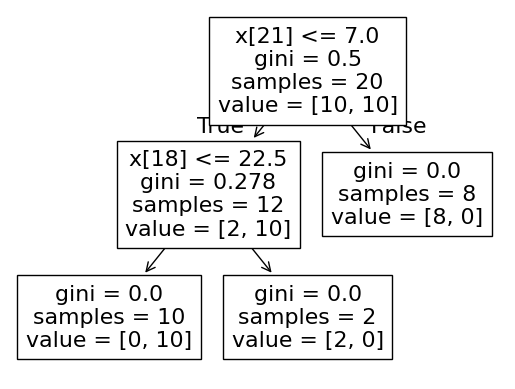

In [65]:
tree.plot_tree(tr)

In [66]:
tr.predict(X)

array(['GEOM3', 'GEOM3', 'GEOM3', 'GEOM3', 'GEOM3', 'GEOM3', 'GEOM3',
       'GEOM3', 'GEOM3', 'GEOM3', 'ER3', 'ER3', 'ER3', 'ER3', 'ER3',
       'ER3', 'ER3', 'ER3', 'ER3', 'ER3'], dtype=object)

In [ ]:


# load a graph
G = nx.read_adjlist("demo_graph.txt", nodetype=int)

print(f"original graph has {len(G.nodes):d} vertices and {len(G.edges):d} edges")

od = nx.onion_layers(G)

for i in range(1, 21):
    layer_i = [v for v in od.keys() if od[v] == i]
    print(f"layer {i:d} contains {len(layer_i):d} vertices")
